In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

# Logistic Regression

In [2]:
# Load the dataset
df = pd.read_csv('Student-Pass-Fail-Data.csv')

In [3]:
# Check the dataset
print(df.shape)
df.head()

(1000, 3)


,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0


In [4]:
# Define 'Self_Study_Daily', 'Tution_Monthly' as input data and 'Pass_Or_Fail' as output target
X = df.drop('Pass_Or_Fail', axis=1) # axis=0(index), axis=1(column)
y = df.Pass_Or_Fail

In [5]:
# Split the data and target into training dataset and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

In [6]:
# Create the logistic regression object
logreg = LogisticRegression()

In [7]:
# Train the model using the training sets
logreg.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [8]:
# Make predictions using the testing set
y_pred = logreg.predict(X_test)

In [9]:
# The coefficients
print("Coefficients: \n", logreg.coef_)
print("Intercept: \n", logreg.intercept_)

# Find the accuracy
acc = metrics.accuracy_score(y_test, y_pred) * 100 # percentage
print("The test accuracy: %.2f" % acc)

Coefficients: 
 [[ 2.54032198 -0.62709942]]
Intercept: 
 [1.23380331]
The test accuracy: 95.50


#### ln(p/(1-p)) = 2.54x1 - 0.63x2 + 1.23 (x1: "Self_Study_Daily", x2: "Tution_Monthly")

In [10]:
# Predicting whether a new studuent will fail or pass
First_friend = logreg.predict((np.array([4, 38]).reshape(1, -1)))
First_friend # Fail

array([0], dtype=int64)

In [11]:
# Predicting whether a new studuent will fail or pass
Second_friend = logreg.predict((np.array([8, 29]).reshape(1, -1)))
Second_friend # Pass

array([1], dtype=int64)

In [12]:
np.array([1, 11]).reshape(1, -1)

array([[ 1, 11]])

# [Practice 2] : the digit dataset (classification)
### P2.1. You should fill in the blank between # and # with code

In [13]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# Load the dataset (Digits Dataset)
digits = load_digits()
X, y = digits.data, digits.target

In [15]:
# Check the dataset
#######################################
print(X.shape, y.shape) # 1797개의 digits dataset
print(X[0].shape) # 1개의 digit 당 8*8=64 dimentional features
#######################################

(1797, 64) (1797,)
(64,)


### P2.2. You should write down the answers of the number of data and features in ( ? )
#### The number of data : ( ? )
#### The number of features : ( ? )

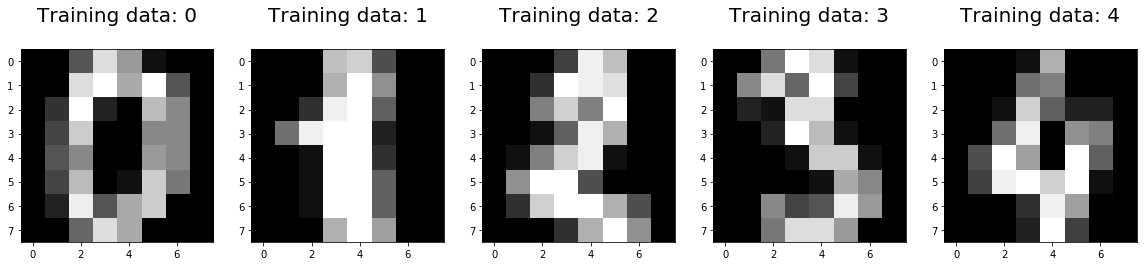

In [16]:
plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(X[0:5], y[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    plt.title('Training data: %i\n' % label, fontsize=20)

In [17]:
# Split the data into training an dtest sets (Digits Dataset)
#######################################
####### Use random_state = 2020 #######
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)
#######################################

In [18]:
# Make an instance of the Model
#################################################
logistic = LogisticRegression()
#################################################

# Train the model using the training sets
#################################################
logistic.fit(X_train, y_train)
#################################################

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
# Make the prediction of first element of test datasets
logistic.predict(X_test[0].reshape(1, -1))

array([4])

### P2.3. You should write down the answer of the first digit of test datasets which fitted model predicts
#### The first digit of test datasets : ( ? )

In [20]:
# Make the prediction of first ten test datasets
##################################################################
logistic.predict(X_test[:10])
##################################################################

array([4, 3, 6, 4, 8, 7, 2, 2, 1, 2])

### P2.4. You should write down the answer of the first ten digits of test datasets which fitted model predicts
#### The first ten digits of test datasets : (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)

In [21]:
# Make predictions on entire test data
##################################################################
y_pred = logistic.predict(X_test)
##################################################################

In [22]:
# Find the coefficients and Intercept
##################################################################
############# It could be a line or two lines ####################
print("Coefficients: \n", logistic.coef_)
print("Intercept: \n", logistic.intercept_)
##################################################################

# Find the accuracy an
##################################################################
############# It could be a line or two lines ####################
acc = metrics.accuracy_score(y_test, y_pred) * 100 # percentage
print("The test accuracy: %.2f" % acc)
##################################################################

Coefficients: 
 [[ 0.00000000e+00 -5.12807721e-02 -5.88180541e-02  1.06339862e-02
  -6.80093933e-02 -3.89737979e-01 -2.09187020e-01 -7.12187227e-03
  -1.35469911e-05 -1.20254235e-01 -2.19108281e-02  1.41398537e-01
   1.13031367e-01  2.85594944e-01  2.60387266e-02 -8.28282669e-03
  -3.08800595e-03  1.10879389e-01  1.94708203e-01 -7.04140090e-02
  -3.58337827e-01  2.84419921e-01 -7.67011795e-02 -1.09804094e-02
  -1.54199050e-03  2.80561021e-02 -3.42229184e-02 -1.60776154e-01
  -5.67209792e-01 -3.31622950e-02  1.29276851e-01 -2.32640597e-03
   0.00000000e+00  2.61028920e-01  1.45355661e-01 -1.77486996e-01
  -5.55848459e-01 -8.81052886e-02 -4.25133971e-02  0.00000000e+00
  -5.28865365e-03  1.42092741e-02  1.31313246e-01 -2.24634344e-01
  -4.13629272e-01  3.29430610e-02  1.04521702e-01 -8.51506920e-05
  -1.85793536e-02 -8.10314465e-02  1.19547315e-02  7.81177595e-03
   1.78536734e-01  4.53966968e-02 -2.06309514e-01 -7.73621277e-02
  -4.27498864e-06 -6.18133447e-02 -1.87350360e-01  1.8440725

### P2.5. You should write down the answer of the test accuracy
#### The test accuracy : ( ? )